In [250]:
import math
import pandas as pd
from scipy.misc import derivative
import matplotlib.pyplot as plt
import numpy as np

Нелинейным называется уравнение вида $\varphi(x) = 0$, где $\varphi(x)$ — некоторая нелинейная функция.

Определим уравнения: 

1. $4(1-x^2) - e^2$
2. $x^3 - x - 2$
3. $\sqrt{x} + 2$

In [251]:
def function_1(x):
    return 4 * (1 - x**2) - math.exp(x)

def function_2(x):
    return x**3 - x - 2

def function_3(x):
    return x ** 0.5 + 2

### Метод бисекции

Метод бисекции или метод деления отрезка пополам — простейший численный метод для решения нелинейных уравнений вида $f(x)=0$. Предполагается только непрерывность функции $f(x)$.

In [252]:
def bisection(func, a, b, eps):
    df = pd.DataFrame(columns=['iteration', 'a', 'b', 'x_n', 'f(x_n)'])
    k = 0
    while b - a >= 2 * eps:     
        x0 = (a + b) / 2
        df.loc[len(df)] = [k, a, b, x0, func(x0)]
        a, b = (a, x0) if func(a) * func(x0) <= 0 else (x0, b)
        k += 1
    return x0, df

Найдем корень уравнения $4(1-x^2) - e^2 = 0$ на отрезке [0, 1]

In [253]:
res, df_iter = bisection(function_1, a=0, b=1, eps=1e-2)
df_iter

,iteration,a,b,x_n,f(x_n)
0,0.0,0.0000,1.00000,0.500000,1.351279
1,1.0,0.5000,1.00000,0.750000,-0.367000
2,2.0,0.5000,0.75000,0.625000,0.569254
3,3.0,0.6250,0.75000,0.687500,0.120638
4,4.0,0.6875,0.75000,0.718750,-0.118273
5,5.0,0.6875,0.71875,0.703125,0.002405


In [254]:
print(f'После {len(df_iter)} итераций x сходится к {res}')

После 6 итераций x сходится к 0.703125


Найдем корень уравнения $x^3 - x - 2$ на отрезке [1, 2]

In [255]:
res, df_iter = bisection(function_2, a=1, b=2, eps=10e-5)
df_iter

,iteration,a,b,x_n,f(x_n)
0,0.0,1.000000,2.000000,1.500000,-0.125000
1,1.0,1.500000,2.000000,1.750000,1.609375
2,2.0,1.500000,1.750000,1.625000,0.666016
3,3.0,1.500000,1.625000,1.562500,0.252197
4,4.0,1.500000,1.562500,1.531250,0.059113
5,5.0,1.500000,1.531250,1.515625,-0.034054
6,6.0,1.515625,1.531250,1.523438,0.012250
7,7.0,1.515625,1.523438,1.519531,-0.010971
8,8.0,1.519531,1.523438,1.521484,0.000622
9,9.0,1.519531,1.521484,1.520508,-0.005179


In [256]:
print(f'После {len(df_iter)} итераций x сходится к {res}')

После 13 итераций x сходится к 1.5213623046875


### Метод простой итерации

Метод простой итерации — один из простейших численных методов решения уравнений. 

Итерационный процесс определяется как $x_{n+1}=f(x_{n}),n=0,1,2,\dots$

#### Для сходимости алгоритма необходимо, чтобы функция $f(x)$ являлась сжимающим отображением.

Найдем корень уравнения $\sqrt{x} + 2 = 0$ при $x_0$ = 1.7 и $\varepsilon = 10^{-2}$

In [257]:
def fixed_point(func, x0, eps, n_iter=100):
    df = pd.DataFrame(columns=['iteration', 'x_n', 'f(x_n)'])
    for i in range(n_iter):
        x = func(x0)
        df.loc[len(df)] = [i, x0, func(x0)]
        if abs(x - x0) < eps:
            break
        x0 = x
    return x, df   

In [258]:
res, df_iter = fixed_point(function_3, x0=1.7, eps=1e-2)
df_iter

,iteration,x_n,f(x_n)
0,0.0,1.700000,3.303840
1,1.0,3.303840,3.817647
2,2.0,3.817647,3.953880
3,3.0,3.953880,3.988437
4,4.0,3.988437,3.997107


In [259]:
print(f'После {len(df_iter)} итераций x сходится к {res}')

После 5 итераций x сходится к 3.9971070491793395


Геометрическое представление итерационного процесса

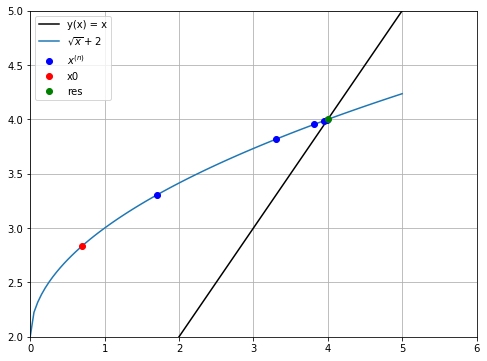

In [260]:
x = np.linspace(0,5,100)
y = function_3(x)

plt.figure(figsize=(8, 6))
plt.plot(x, x, 'k', label='y(x) = x')
plt.plot(x, y, label=r'$\sqrt{x} + 2$')
plt.plot(df_iter['x_n'], function_3(df_iter['x_n']), 'bo', label=r'$x^{(n)}$')
plt.plot(0.7, function_3(0.7), 'ro', label='x0')
plt.plot(res, function_3(res), 'go', label='res')

plt.axis([0, 6, 2, 5])
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

### Метод Ньютона

Метод Ньютона — итерационный численный метод нахождения корня заданной функции. Поиск решения осуществляется путём построения последовательных приближений и основан на принципах простой итерации.

Для численного решения уравнения $f(x)=0$ методом простой итерации, его необходимо привести к эквивалентному уравнению: $x = \varphi(x)$, где $\varphi(x)$ — сжимающее отображение.

Для наилучшей сходимости метода в точке очередного приближения $x^{*}$ должно выполняться условие $\varphi'(x^{*})=0$.
С учётом этого функция  $\varphi(x)$ определяется как $\varphi(x) = x - \frac{f(x)}{f'(x)}$

Метод имеет квадратичную сходимость.

In [261]:
def newton(func, x0, eps, n_iter=100):
    df = pd.DataFrame(columns=['iteration', 'x_n', 'f(x_n)', '|x - x_prev|'])
    x, x_prev = x0, x0 + 2 * eps
    k = 0
    while abs(x - x_prev) >= eps and k < n_iter:
        f = func(x)
        df.loc[len(df)] = [k, x, f, abs(x - x_prev)]
        dy = derivative(func, x, dx=1e-6)
        x, x_prev = x - f / dy, x
        k += 1
    return x, df   

Найдем корень уравнения $4(1-x^2) - e^2 = 0$ при $x_0 = 0.5$

In [262]:
res, df_newton = newton(function_1, x0=0.5, eps=1e-6)
df_newton

,iteration,x_n,f(x_n),|x - x_prev|
0,0.0,0.500000,1.351279,0.000002
1,1.0,0.739219,-0.280074,0.239219
2,2.0,0.704244,-0.006159,0.034974
3,3.0,0.703440,-0.000003,0.000804


### Модификации метода Ньютона

#### Упрощенный метод Ньютона - метод одной касательной

В целях уменьшения числа обращений к значениям производной функции применяют так называемый метод одной касательной.
Формула итераций этого метода имеет вид: $x_{n+1} = x_n - \frac{1}{f'(x_0)}f(x_n)$

Этот метод является частным случаем метода простой итерации. Он имеет линейный порядок сходимости.

In [263]:
def simple_newton(func, x0, eps, n_iter=100):
    df = pd.DataFrame(columns=['iteration', 'x_n', 'f(x_n)', '|x - x_prev|'])
    x, x_prev = x0, x0 + 2 * eps
    dy = derivative(func, x, dx=1e-6)
    k = 0
    while abs(x - x_prev) >= eps and k < n_iter:
        f = func(x)
        df.loc[len(df)] = [k, x, f, abs(x - x_prev)]
        x, x_prev = x - f / dy, x
        k += 1
    return x, df  

Найдем корень уравнения $4(1-x^2) - e^2 = 0$ при $x_0 = 0.5$

In [264]:
res_simple, df_simple_newton = simple_newton(function_1, x0=0.5, eps=1e-6)
df_simple_newton

,iteration,x_n,f(x_n),|x - x_prev|
0,0.0,0.500000,1.351279,0.000002
1,1.0,0.739219,-0.280074,0.239219
2,2.0,0.689637,0.104614,0.049582
3,3.0,0.708157,-0.036188,0.018520
4,4.0,0.701750,0.012907,0.006406
5,5.0,0.704035,-0.004556,0.002285
6,6.0,0.703228,0.001614,0.000807
7,7.0,0.703514,-0.000571,0.000286
8,8.0,0.703413,0.000202,0.000101
9,9.0,0.703449,-0.000072,0.000036


#### Метод секущих

Родственный метод секущих является «приближённым» методом Ньютона и позволяет не вычислять производную. Значение производной в итерационной формуле заменяется её оценкой по двум предыдущим точкам итераций:

$f'(x_n) = \frac{f(x_{n}) - f(x_{n-1})}{x_{n} - x_{n-1}}$

In [265]:
def secant(func, x0, eps, n_iter=100):
    df = pd.DataFrame(columns=['iteration', 'x_n', 'f(x_n)', '|x - x_prev|'])
    x, x_prev = x0, x0 + 2 * eps
    k = 0
    while abs(x - x_prev) >= eps and k < n_iter:
        f = func(x)
        f_prev = func(x_prev)
        dy = (f - f_prev) / (x - x_prev)
        df.loc[len(df)] = [k, x, f, abs(x - x_prev)]
        x, x_prev = x - f / dy, x
        k += 1
    return x, df

Найдем корень уравнения $4(1-x^2) - e^2 = 0$ при $x_0 = 0.5$

In [266]:
res_secant, df_secant = secant(function_1, x0=0.5, eps=1e-6)
df_secant

,iteration,x_n,f(x_n),|x - x_prev|
0,0.0,0.500000,1.351279,0.000002
1,1.0,0.739218,-0.280071,0.239218
2,2.0,0.698149,0.040323,0.041069
3,3.0,0.703318,0.000932,0.005169
4,4.0,0.703440,-0.000003,0.000122


### Метод Стеффенсена

Итерационная формула метода имеет вид:

$x_{n+1} = x_n - \frac{f(x_n)}{f(x_n + f(x_n)) -  f(x_n)}f(x_n), n \geqslant 0$

Является одношаговым, не требует вычисления производной, сходится квадратично.

In [268]:
def steffensen(func, x0, eps, n_iter=100):
    df = pd.DataFrame(columns=['iteration', 'x_n', 'f(x_n)', '|x - x_prev|'])
    x, x_prev = x0, x0 + 2 * eps
    k = 0
    while abs(x - x_prev) >= eps and k < n_iter:
        f = func(x)
        dy = func(x + f) - f
        df.loc[len(df)] = [k, x, f, abs(x - x_prev)]
        x, x_prev = x - f / dy * f, x
        k += 1
    return x, df

Найдем корень уравнения $4(1-x^2) - e^2 = 0$ при $x_0 = 0.5$

In [276]:
res_steffensen, df_steffensen = steffensen(function_1, x0=0.5, eps=1e-6)
df_steffensen

,iteration,x_n,f(x_n),|x - x_prev|
0,0.0,0.500000,1.351279e+00,0.000002
1,1.0,0.604770,7.061800e-01,0.104770
2,2.0,0.673175,2.268863e-01,0.068405
3,3.0,0.699888,2.709975e-02,0.026713
4,4.0,0.703385,4.141452e-04,0.003497
5,5.0,0.703440,9.765471e-08,0.000054


Сравнение количества итераций метода Ньютона и его модификаций

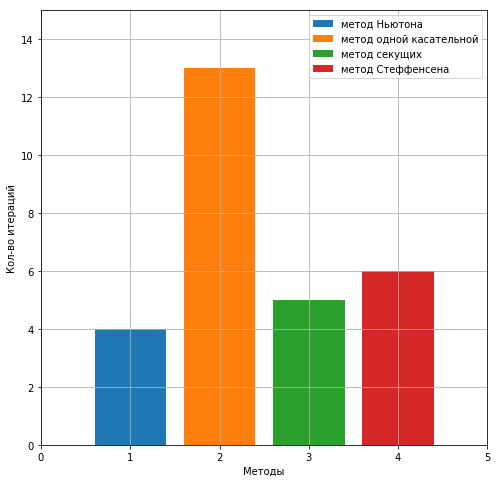

In [275]:
fig, ax = plt.subplots()
ax.bar(1, len(df_newton), label='метод Ньютона')
ax.bar(2, len(df_simple_newton), label='метод одной касательной')
ax.bar(3, len(df_secant), label='метод секущих')
ax.bar(4, len(df_steffensen), label='метод Стеффенсена')
fig.set_figwidth(8)    
fig.set_figheight(8)    

plt.ylabel("Кол-во итераций")
plt.xlabel("Методы")
plt.axis([0, 5, 0, 15])
plt.grid(True)
plt.legend(loc='upper right')
plt.show()